In [1]:
import os, sys, numpy, pylab, importlib, pickle, gzip, json
from covid19_stats.engine import core, gis, viz
from covid19_stats import COVID19Database
from matplotlib.patches import Polygon
from itertools import chain
from nprstuff.core import autocrop_image
%matplotlib inline

This notebook tests whether the Metropolitan Statistical Area (MSA) makes sense. Here, you just plop out which MSA to visualize, say "chicago" or "nyc". It will spit out a figure showing the counties, with FIPS numbers, for that metro region.

Looks like I have all the counties defined for the NYC Metro Area. After git commit [#fd664d](https://github.com/tanimislam/covid19_stats/commit/fd664daaec025943e4b550c981ae3ea3aace6a28), New York City is a county in the "nyc" metro area with FIPS # "00001".

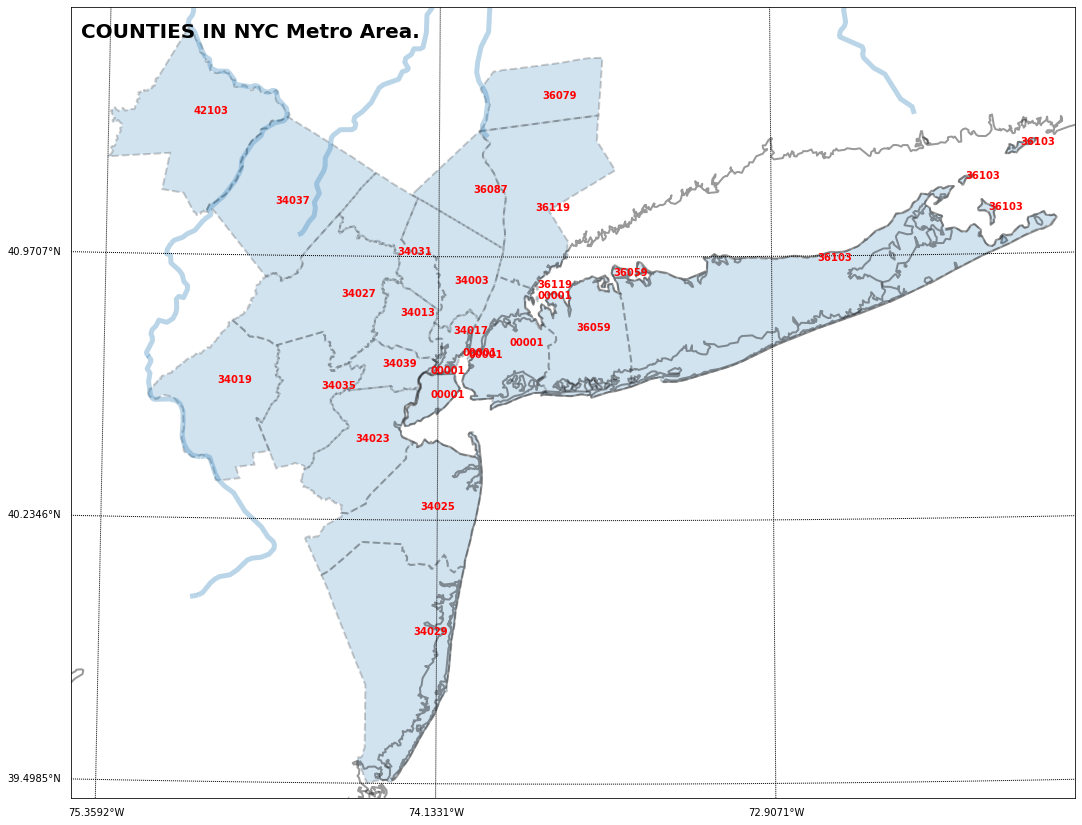

In [3]:
fig = pylab.figure()
fig.set_size_inches([18,12])
ax = fig.add_subplot(111)
viz.display_msa( 'nyc', ax, doShow=True )
for patch in ax.patches:
    patch._alpha = 0.2

Now collect the incident data for the CONUS, and store into the file. Subsequent operations will just *load* this serialized file into this notebook.

In [9]:
cdat = COVID19Database( )
inc_data_conus = core.get_incident_data( cdat.data_conus( ) )
pickle.dump( inc_data_conus, gzip.open( 'data_conus_LATEST.pkl.gz', 'wb') )

In subsequent operations, just **load** the `inc_data_conus` from the file.

In [10]:
inc_data_conus = pickle.load( gzip.open( 'data_conus_LATEST.pkl.gz', 'rb'))

Here are the 7 day and 1 day COVID-19 case and death rates for the `CONUS`

In [42]:
cases_rate_7day = ( numpy.array(inc_data_conus['df'].cases, dtype=float )[7:] - numpy.array( inc_data_conus['df'].cases, dtype=float)[:-7] ) / 7
cases_rate_1day = ( numpy.array(inc_data_conus['df'].cases, dtype=float )[1:] - numpy.array( inc_data_conus['df'].cases, dtype=float)[:-1] ) / 1
days_7day = numpy.array( list(range(7,len(numpy.array(inc_data_conus['df'].cases, dtype=float ) ))), dtype=int )
days_1day = numpy.array( list(range(1,len(numpy.array(inc_data_conus['df'].cases, dtype=float ) ))), dtype=int )
#
death_rate_7day = ( numpy.array(inc_data_conus['df'].death, dtype=float )[7:] - numpy.array( inc_data_conus['df'].death, dtype=float)[:-7] ) / 7
death_rate_1day = ( numpy.array(inc_data_conus['df'].death, dtype=float )[1:] - numpy.array( inc_data_conus['df'].death, dtype=float)[:-1] ) / 1

Plot of the 7 day and 1 day averaged new COVID-19 case rate for the `CONUS`.

Text(0.5, 1.0, 'AVERAGED COVID-19 NEW CASES RATES FOR CONUS')

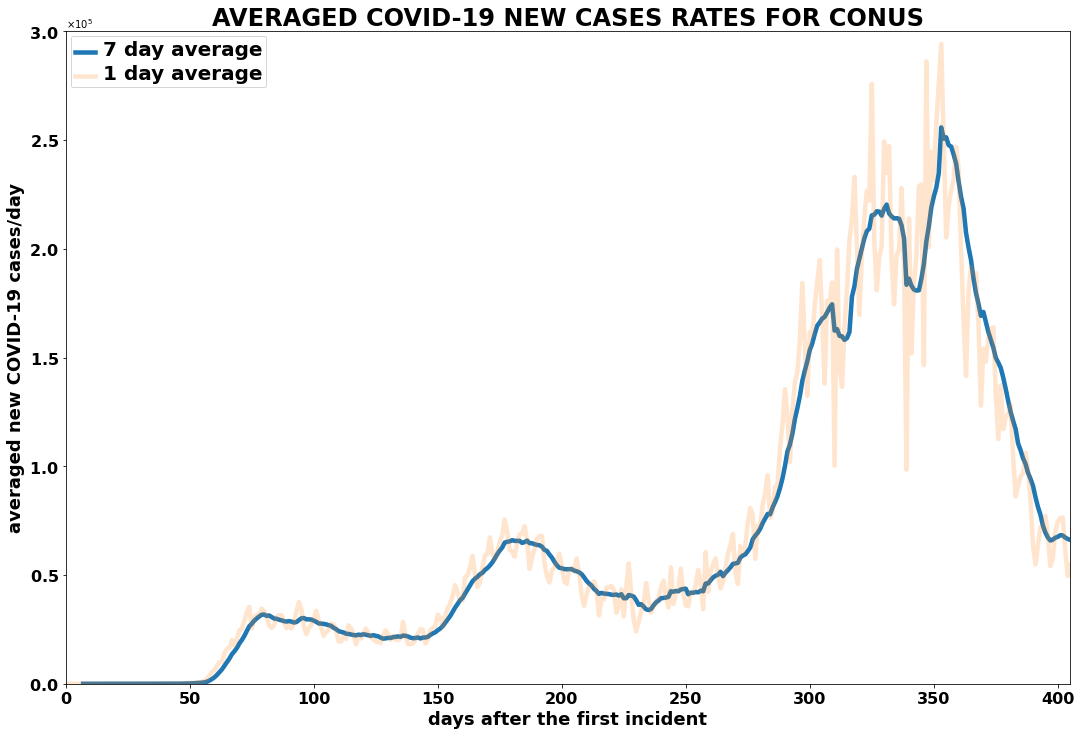

In [54]:
fig, ax = pylab.subplots( )
fig.set_size_inches([18,12])
#
ax.plot( days_7day, cases_rate_7day, linewidth = 4.5, label = '7 day average' )
ax.plot( days_1day, cases_rate_1day, alpha = 0.2, linewidth = 4.5, label = '1 day average' )
#
ax.set_xlim(0, len(numpy.array(inc_data_conus['df'].cases, dtype=float ) ) - 1 )
ax.set_ylim(0, 3e5)
ax.set_xlabel( 'days after the first incident', fontsize = 18, fontweight = 'bold' )
ax.set_ylabel( 'averaged new COVID-19 cases/day', fontsize = 18, fontweight = 'bold')
for tick in ax.xaxis.get_ticklabels() + ax.yaxis.get_ticklabels( ):
    tick.set_fontsize( 16 )
    tick.set_fontweight( 'bold')
ax.ticklabel_format(axis='y', scilimits=(0,0), useMathText = True)
leg = ax.legend( )
for txt in leg.texts:
    txt.set_fontsize( 20 )
    txt.set_fontweight( 'bold' )
ax.set_title( 'AVERAGED COVID-19 NEW CASES RATES FOR CONUS', fontsize = 24, fontweight = 'bold')

Text(0.5, 1.0, 'AVERAGED COVID-19 NEW DEATHS RATES FOR CONUS')

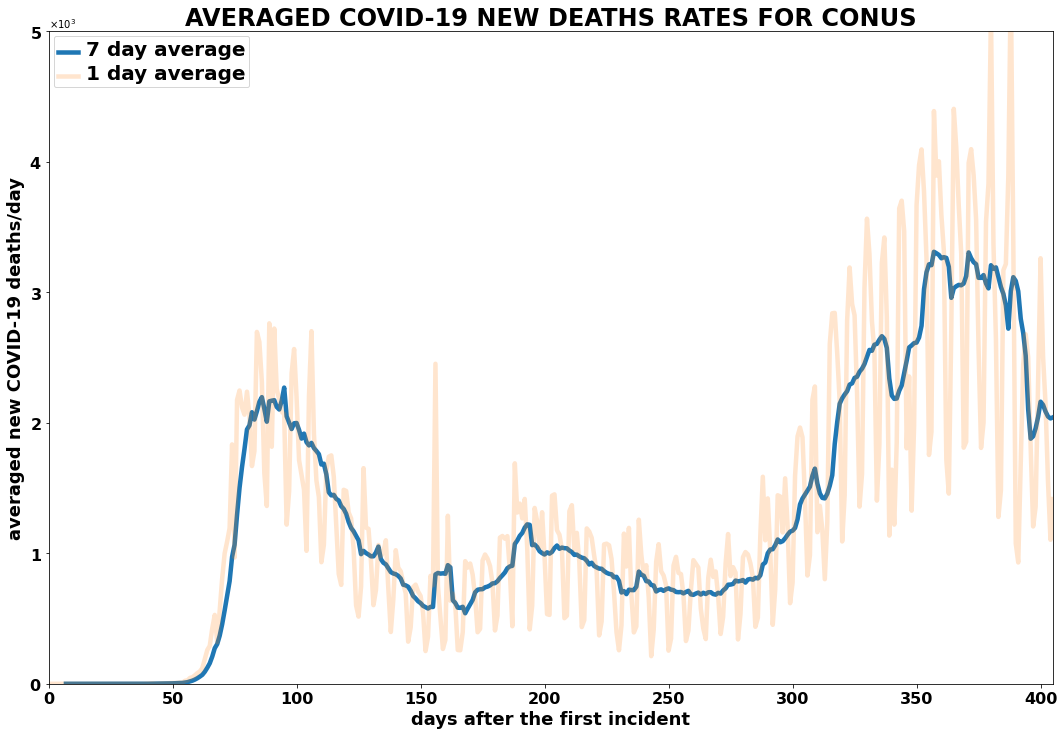

In [55]:
fig, ax = pylab.subplots( )
fig.set_size_inches([18,12])
ax.plot( days_7day, death_rate_7day, linewidth = 4.5, label = '7 day average' )
ax.plot( days_1day, death_rate_1day, alpha = 0.2, linewidth = 4.5, label = '1 day average' )
ax.set_xlim(0, len(numpy.array(inc_data_conus['df'].cases, dtype=float ) ) - 1 )
ax.set_ylim(0, 5000)
ax.set_xlabel( 'days after the first incident', fontsize = 18, fontweight = 'bold' )
ax.set_ylabel( 'averaged new COVID-19 deaths/day', fontsize = 18, fontweight = 'bold')
for tick in ax.xaxis.get_ticklabels() + ax.yaxis.get_ticklabels( ):
    tick.set_fontsize( 16 )
    tick.set_fontweight( 'bold')
ax.ticklabel_format(axis='y', scilimits=(0,0), useMathText = True)
leg = ax.legend( )
for txt in leg.texts:
    txt.set_fontsize( 20 )
    txt.set_fontweight( 'bold' )
ax.set_title( 'AVERAGED COVID-19 NEW DEATHS RATES FOR CONUS', fontsize = 24, fontweight = 'bold')